# Playing with Fourier magnitude and phase

In [1]:
import numpy as np
from scipy.fftpack import fft2, ifft2
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 8)

## Swapping Fourier magnitude and phase in 2d greyscale images

In [2]:
def to_magnitude_phase(img):
    fourier = fft2(img)
    magnitude = np.abs(fourier)
    phase = fourier / magnitude
    return magnitude, phase

def from_magnitude_phase(magnitude, phase):
    fourier = magnitude * phase
    return np.real(ifft2(fourier))

def swap_magnitude(a, b):
    """Swap the Fourier magnitudes of a and b (but leave their Fourier phases in tact)."""
    a_magnitude, a_phase = to_magnitude_phase(a)
    b_magnitude, b_phase = to_magnitude_phase(b)
    return (
        from_magnitude_phase(b_magnitude, a_phase),
        from_magnitude_phase(a_magnitude, b_phase)
    )

def swap_plot(a, a_name, b, b_name):
    f, ax = plt.subplots(2, 2)
    for ax_elt in ax.flatten():
        ax_elt.set_axis_off()
    ax[0,0].imshow(a, cmap="Greys_r")
    ax[0,0].set_title(a_name)
    ax[0,1].imshow(b, cmap="Greys_r")
    ax[0,1].set_title(b_name)
    a_swapped, b_swapped = swap_magnitude(a, b)
    ax[1,0].imshow(a_swapped, cmap="Greys_r")
    ax[1,0].set_title('Magnitude: %s\nPhase: %s' % (b_name, a_name))
    ax[1,1].imshow(b_swapped, cmap="Greys_r")
    ax[1,1].set_title('Magnitude: %s\nPhase: %s' % (a_name, b_name))
    return f, ax

(<matplotlib.figure.Figure at 0x1100f8748>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1101786a0>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x1130867b8>]], dtype=object))

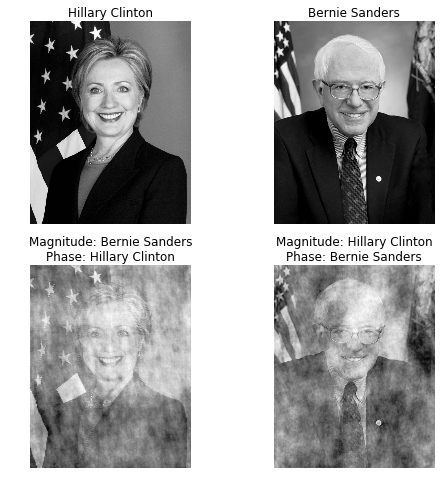

In [3]:
bernie = io.imread('Bernie_Sanders.jpg', as_grey=True)
hillary = io.imread('Hillary_Clinton.jpg', as_grey=True)
swap_plot(hillary, 'Hillary Clinton', bernie, 'Bernie Sanders')

The bottom left picture looks recognizably like Hillary Clinton and the bottom right picture looks recognizably like Bernie Sanders. The photos just seem a little faded. Evidently, human image recognition relies a lot more on phase than on magnitude.

But did it matter that both pictures were portraits? To check this, let's try swapping Bernie Sanders with a completely different picture.

(<matplotlib.figure.Figure at 0x11b445fd0>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b427be0>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x11befd2e8>]], dtype=object))

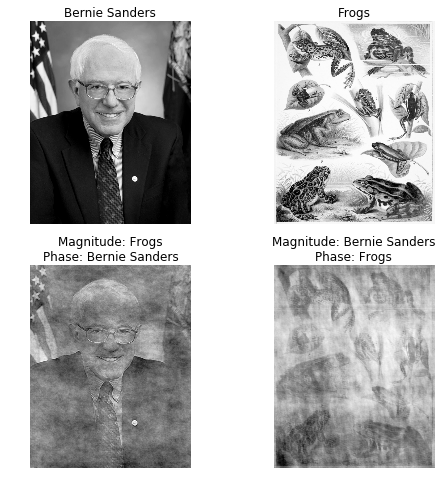

In [4]:
bernie = io.imread('Bernie_Sanders.jpg', as_grey=True)
frogs = io.imread('frogs.jpg', as_grey=True)
swap_plot(bernie, 'Bernie Sanders', frogs, 'Frogs')

Even for these two very different pictures, the phase clearly dominates in human visual perception.